In [1]:
import os
import cv2 # computer vision
import matplotlib.pyplot as  plt

# MASK AND NO-MASK dataset

In [3]:
image_size = 250  #v hyper-parameter

path2 = r"E:\Imarticisans\Mask_No_Maskvc2"
categ = [ 'MASK' , 'No_MASK' ]


input_image1 = []
for i in categ:
    folders = os.path.join(path2 , i)  
    label = categ.index(i)   
    for image in os.listdir(folders):
        image_path = os.path.join( folders , image)
        image_array = cv2.imread(image_path)  # here images has readed and stored in variable
        image_array = cv2.resize(image_array , ( image_size , image_size))   
        input_image1.append([ image_array , label])

In [5]:
len(input_image1)

816

In [6]:
import numpy as np
np.random.shuffle( input_image1) 


In [7]:
x = []
y = []

for x_values , labels in input_image1 :
    x.append(x_values)
    y.append(labels)

In [8]:
type(x)

list

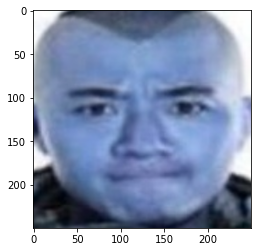

In [9]:
plt.imshow(x[1])  # Just for referance , that the daata is shuffled

In [10]:
x = np.array(x)
y = np.array(y)

In [12]:
x = x/225

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Dense , Flatten , Dropout
from keras.utils.np_utils import to_categorical

model1 = Sequential()

model1.add(Conv2D(filters = 15 ,kernel_size=(4,4),activation='relu'))
model1.add(MaxPool2D( pool_size = ( 2, 2)))

model1.add(Flatten())

#model1.add(Dropout(0.3))

model1.add(Dense(128,activation='relu' , input_shape= x.shape[ 1: ]))
model1.add(Dense(2 ,activation='softmax'))


model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model1.fit( x , y , epochs = 10  ,validation_split=0.2 )

Epoch 1/10
21/21 [==============================] - 118s 3s/step - loss: 0.5952 - accuracy: 0.6856 - val_loss: 0.3579 - val_accuracy: 0.9268
Epoch 2/10
21/21 [==============================] - 23s 1s/step - loss: 0.3999 - accuracy: 0.8313 - val_loss: 0.2516 - val_accuracy: 0.9451
Epoch 3/10
21/21 [==============================] - 24s 1s/step - loss: 0.2599 - accuracy: 0.9294 - val_loss: 0.1807 - val_accuracy: 0.9695
Epoch 4/10
21/21 [==============================] - 26s 1s/step - loss: 0.1618 - accuracy: 0.9571 - val_loss: 0.2778 - val_accuracy: 0.8841
Epoch 5/10
21/21 [==============================] - 26s 1s/step - loss: 0.2285 - accuracy: 0.9064 - val_loss: 0.1336 - val_accuracy: 0.9329
Epoch 6/10
21/21 [==============================] - 23s 1s/step - loss: 0.1102 - accuracy: 0.9601 - val_loss: 0.1158 - val_accuracy: 0.9390
Epoch 7/10
21/21 [==============================] - 24s 1s/step - loss: 0.0900 - accuracy: 0.9678 - val_loss: 0.1035 - val_accuracy: 0.9512
Epoch 8/10
21/21 [=

In [18]:
pred_mask = model1.predict(x)

In [19]:
pred_class = np.argmax ( pred_mask ,axis = 1)
pred_class

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix( y , pred_class)

array([[399,   9],
       [  6, 402]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y , pred_class)

0.9816176470588235

In [22]:
model1.save("mask_no_mask.h5")

In [1]:
from keras import models
from keras.models import load_model
model_mask_No_mask = load_model("mask_no_mask.h5")

In [2]:
import cv2 
import numpy as np

In [3]:
results   =   {        0:'Mask not found'     ,      1:'Mask found '}
GR_dict={0:(0,255,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0)
haarcascade = cv2.CascadeClassifier( r"E:\Imarticisans\CV2- Harcasted\haarcascade_frontalface_alt.xml")
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(250,250))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,250,250,3))
        reshaped = np.vstack([reshaped])
        result= model_mask_No_mask.predict(reshaped)
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)

    cv2.imshow('Liv Camera',   im)
    key = cv2.waitKey(10)
    
    if key == 27: # use the escape key
        break

cap.release()

cv2.destroyAllWindows()

# We got accuracy upto 98% , hence model is good accuracy using CV we can check how good model is performing.